In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
from io import StringIO
import re
import plotly.express as px

In [5]:
df = pd.read_csv('/content/02_PTSD_and_Sleep_Meta_Data.csv')
display (df)


,StudyID,SLEEPmeas,PTSDmeas,esID,SleepOutcome,ES_type,zcor,varcor,smd,varsmd,...,ptsdsevmeasuretype_01,ptsdsevmeasuretype_10,PTSDmeasureAlpha,PTSDmeasureAlphaFromCurrentStudy,PSQImeanPTSD,subsetMpsqiPTSD,MpsqiPTSD_mc,PSQImeanNONPTSD,subsetPSQImeanNONPTSD,mpsqiNONPTSD_mc
0,106,Diary,CAPS,1,WAKE,r,-0.023004,0.014085,NaN,NaN,...,1.0,0.0,NaN,No alpha reported,NaN,11.298298,NaN,NaN,6.707000,NaN
1,106,Diary,CAPS,2,BED,r,0.099325,0.013333,NaN,NaN,...,1.0,0.0,NaN,No alpha reported,NaN,11.298298,NaN,NaN,6.707000,NaN
2,1047,PSQI,PDS,3,WAKE,r,0.266108,0.026316,NaN,NaN,...,0.0,1.0,NaN,No alpha reported,11.05,11.298298,-0.248298,5.12,6.707000,-1.587000
3,1047,PSQI,Diagnosis,4,WAKE,d,NaN,NaN,-0.324735,0.038551,...,NaN,NaN,NaN,NaN,11.05,10.216154,0.833846,5.12,6.700833,-1.580833
4,1047,PSQI,PDS,5,BED,r,0.171667,0.026316,NaN,NaN,...,0.0,1.0,NaN,No alpha reported,11.05,11.298298,-0.248298,5.12,6.707000,-1.587000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,3775,PSQI,PCL,353,WAKE,r,-1.245440,0.250000,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353,3775,PSQI,PCL,354,BED,r,-0.796366,0.250000,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,3775,PSQI,Diagnosis,355,TST,d,NaN,NaN,-0.549935,0.193526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355,3775,PSQI,Diagnosis,356,WAKE,d,NaN,NaN,-0.097804,0.188477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.to_csv('saved_dataframe.csv', index=False)
print("DataFrame saved to 'saved_dataframe.csv'")

DataFrame saved to 'saved_dataframe.csv'


In [28]:
patterns_to_drop = [
    r"Otherspecify",             # כל סוגי OtherSpecify
    r"OtherSpecify",
    r"otherpsych",
    r"peerreview",
    r"raw_agg",
    r"fidelitydescribed",
    r"PTSDmeasureAlpha",
    r"PTSDmeasureAlphaFromCurrentStudy",
    r"DSMsev",
    r"clinicaltrial",
    r"usa_other|USAother",
    r"subset",
    r"_mc$",                      # ערכים ממורכזים
    r"\d\d?$",                    # משתנים שמסתיימים בסיפרתיים = dummy vars
    r"traumatype_v[0-9]",
    r"ptsdsevmeasuretype_",
    r"PTSDdiagnosistool_",
    r"actigraphydevice_"
]

# -------------------------
# 2. המרת ערכים ריקים ל-NaN
# -------------------------
df = df.replace([None, ''], np.nan)

# -------------------------
# 3. זיהוי ומחיקת עמודות לפי דפוסים
# -------------------------
cols_to_drop = []

for col in df.columns:
    if any(re.search(pattern, col, flags=re.IGNORECASE) for pattern in patterns_to_drop):
        cols_to_drop.append(col)

df_cleaned = df.drop(columns=cols_to_drop, errors='ignore')

# -------------------------
# 4. מחיקת עמודות ריקות לחלוטין
# -------------------------
df_cleaned = df_cleaned.dropna(axis=1, how='all')

# -------------------------
# 6. הצגת הטבלה לאחר הניקוי
# -------------------------
display(df_cleaned)

,StudyID,SLEEPmeas,PTSDmeas,esID,SleepOutcome,ES_type,zcor,varcor,smd,varsmd,...,poptype_v2.1civilian,poptype_v2.2mixed,poptype_v3.1civilian,poptype_v3.2veteran,SleepQuestionnaire,PTSDdiagnosticMeasure,PTSDseverityMeasure,PTSDseverityMeasureType,PSQImeanPTSD,PSQImeanNONPTSD
0,106,Diary,CAPS,1,WAKE,r,-0.023004,0.014085,NaN,NaN,...,0.0,0.0,0.0,1.0,No Questionnaire,CAPS,CAPS,Clinician rated,NaN,NaN
1,106,Diary,CAPS,2,BED,r,0.099325,0.013333,NaN,NaN,...,0.0,0.0,0.0,1.0,No Questionnaire,CAPS,CAPS,Clinician rated,NaN,NaN
2,1047,PSQI,PDS,3,WAKE,r,0.266108,0.026316,NaN,NaN,...,1.0,0.0,1.0,0.0,PSQI,CAPS,PDS,Self-report,11.05,5.12
3,1047,PSQI,Diagnosis,4,WAKE,d,NaN,NaN,-0.324735,0.038551,...,1.0,0.0,1.0,0.0,PSQI,CAPS,NaN,NaN,11.05,5.12
4,1047,PSQI,PDS,5,BED,r,0.171667,0.026316,NaN,NaN,...,1.0,0.0,1.0,0.0,PSQI,CAPS,PDS,Self-report,11.05,5.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,3775,PSQI,PCL,353,WAKE,r,-1.245440,0.250000,NaN,NaN,...,1.0,0.0,1.0,0.0,PSQI,CAPS,PCL,Self-report,NaN,NaN
353,3775,PSQI,PCL,354,BED,r,-0.796366,0.250000,NaN,NaN,...,1.0,0.0,1.0,0.0,PSQI,CAPS,PCL,Self-report,NaN,NaN
354,3775,PSQI,Diagnosis,355,TST,d,NaN,NaN,-0.549935,0.193526,...,1.0,0.0,1.0,0.0,PSQI,CAPS,NaN,NaN,NaN,NaN
355,3775,PSQI,Diagnosis,356,WAKE,d,NaN,NaN,-0.097804,0.188477,...,1.0,0.0,1.0,0.0,PSQI,CAPS,NaN,NaN,NaN,NaN


In [29]:
print(df_cleaned.columns.tolist())
df_cleaned.head()

['StudyID', 'SLEEPmeas', 'PTSDmeas', 'esID', 'SleepOutcome', 'ES_type', 'zcor', 'varcor', 'smd', 'varsmd', 'r_og', 'p_og', 'N_og', 'M_ptsd_og', 'SD_ptsd_og', 'N_ptsd_og', 'M_nonptsd_og', 'SD_nonptsd_og', 'N_nonptsd_og', 'd_og', 'dvar_og', 'r', 'p', 'N', 'M_ptsd', 'SD_ptsd', 'N_ptsd', 'M_nonptsd', 'SD_nonptsd', 'N_nonptsd', 'd', 'dvar', 'DoubleChecked', 'SleepMeasureType', 'sleepmeas_v1.1diary', 'sleepmeas_v1.2actigraphy', 'sleepmeas_v2.1selfreport', 'sleepmeas_v2.2actigraphy', 'sleepmeas_v3.1selfreport', 'sleepmeas_v3.2diary', 'pubyear', 'sebsetpubyear_mean', 'DescribedFidelityReliability', 'DSMversionOfSeverityMeasure', 'PTSDinEnglish', 'PTSDenglish_v1.1no', 'PTSDenglish_v1.2mixed', 'PTSDenglish_v2.1yes', 'PTSDenglish_v2.2mixed', 'PTSDenglish_v3.1yes', 'PTSDenglish_v3.2no', 'AnySleepDisruption', 'sleepdisruption', 'PTSDthresholdUsed', 'PTSDthreshold', 'nonPTSDtraumaType', 'nonPTSDtrauma', 'Agg_or_Raw', 'Country', 'USpartState', 'M_age', 'percentF', 'percentW', 'TraumaType', 'Nightmare

,StudyID,SLEEPmeas,PTSDmeas,esID,SleepOutcome,ES_type,zcor,varcor,smd,varsmd,...,poptype_v2.1civilian,poptype_v2.2mixed,poptype_v3.1civilian,poptype_v3.2veteran,SleepQuestionnaire,PTSDdiagnosticMeasure,PTSDseverityMeasure,PTSDseverityMeasureType,PSQImeanPTSD,PSQImeanNONPTSD
0,106,Diary,CAPS,1,WAKE,r,-0.023004,0.014085,NaN,NaN,...,0.0,0.0,0.0,1.0,No Questionnaire,CAPS,CAPS,Clinician rated,NaN,NaN
1,106,Diary,CAPS,2,BED,r,0.099325,0.013333,NaN,NaN,...,0.0,0.0,0.0,1.0,No Questionnaire,CAPS,CAPS,Clinician rated,NaN,NaN
2,1047,PSQI,PDS,3,WAKE,r,0.266108,0.026316,NaN,NaN,...,1.0,0.0,1.0,0.0,PSQI,CAPS,PDS,Self-report,11.05,5.12
3,1047,PSQI,Diagnosis,4,WAKE,d,NaN,NaN,-0.324735,0.038551,...,1.0,0.0,1.0,0.0,PSQI,CAPS,NaN,NaN,11.05,5.12
4,1047,PSQI,PDS,5,BED,r,0.171667,0.026316,NaN,NaN,...,1.0,0.0,1.0,0.0,PSQI,CAPS,PDS,Self-report,11.05,5.12


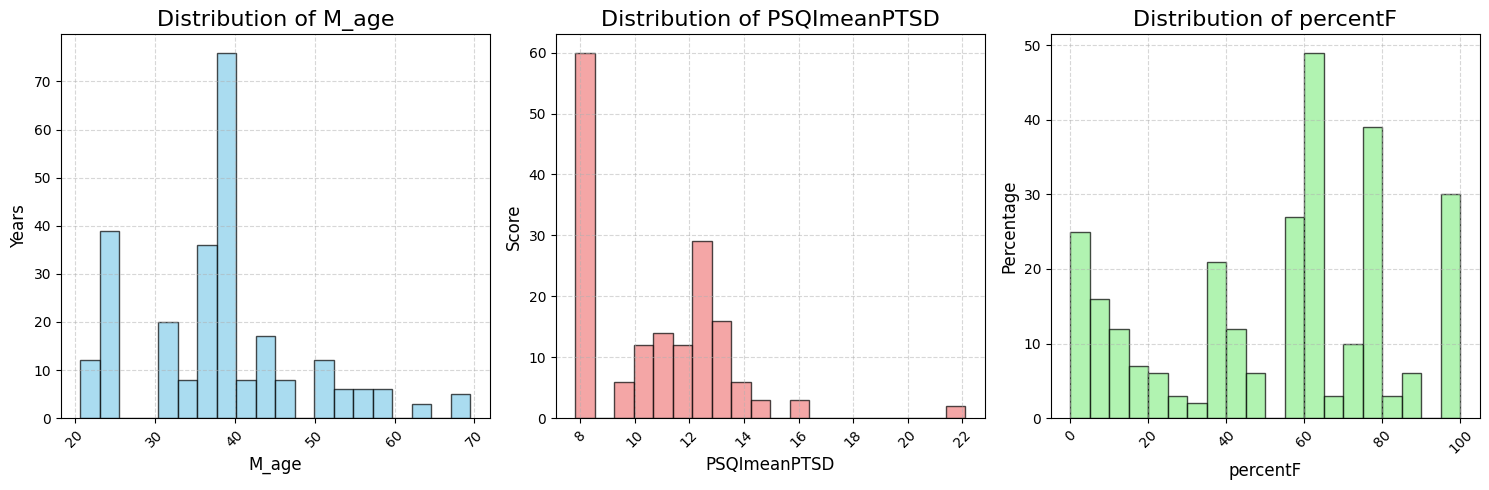

In [30]:
# יצירת היסטוגרמות עבור כל העמודות שנבחרו
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # יצירת 3 גרפים באותו שורה
columns_to_plot = ['M_age', 'PSQImeanPTSD', 'percentF']
colors = ['skyblue', 'lightcoral', 'lightgreen']  # צבעים שונים לכל היסטוגרמה

# תוויות מותאמות אישית עבור ציר ה-Y
y_labels = ['Years', 'Score', 'Percentage']

# יצירת היסטוגרמה עבור כל עמודה
for i, col in enumerate(columns_to_plot):
    axes[i].hist(df_cleaned[col].dropna(), bins=20, edgecolor='black', color=colors[i], alpha=0.7)  # הוספת צבעים שונים
    axes[i].set_title(f'Distribution of {col}', fontsize=16)  # כותרת עם גודל פונטים גדול יותר
    axes[i].set_xlabel(col, fontsize=12)  # תווית ציר X
    axes[i].set_ylabel(y_labels[i], fontsize=12)  # תווית ציר Y מותאמת אישית לכל גרף
    axes[i].tick_params(axis='both', which='major', labelsize=10)  # גודל תוויות הצירים
    axes[i].grid(True, linestyle='--', alpha=0.5)  # הוספת grid עם קווים מקוטעים ושקיפות
    axes[i].tick_params(axis='x', rotation=45)  # סיבוב תוויות הציר X אם יש צורך

# הוספת רווחים בין הגרפים
plt.tight_layout()

# הצגת הגרפים
plt.show()


In [32]:
columns_to_corr = ['PSQImeanPTSD', 'zcor', 'M_age', 'percentF', 'N']
df_cleaned_plot = df_cleaned[columns_to_corr].dropna()

# -------------------------
# 2. חישוב מטריצת הקורלציה
# -------------------------
corr_matrix = df_cleaned_plot.corr()

# -------------------------
# 3. יצירת hover text עם ערכים מדויקים
# -------------------------
hover_text = []
for i in range(len(corr_matrix)):
    hover_text.append([])
    for j in range(len(corr_matrix)):
        hover_text[-1].append(
            f"{corr_matrix.index[i]} vs {corr_matrix.columns[j]}<br>"
            f"Correlation: {corr_matrix.values[i,j]:.2f}<br>"
            f"N: {len(df_cleaned_plot)}"
        )

# -------------------------
# 4. יצירת מפת חום אינטראקטיבית עם annotations
# -------------------------
heatmap = go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    hoverinfo='text',
    text=hover_text,
    showscale=True,
    colorbar=dict(title="Correlation", thickness=20)
)

# הוספת annotations על כל תא
annotations = []
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        annotations.append(
            dict(
                x=corr_matrix.columns[j],
                y=corr_matrix.index[i],
                text=f"{corr_matrix.values[i,j]:.2f}",
                showarrow=False,
                font=dict(color="white" if abs(corr_matrix.values[i,j])>0.5 else "black")
            )
        )

layout = go.Layout(
    title="Enhanced Interactive Heatmap of PTSD & Sleep Measures",
    xaxis=dict(tickangle=-45),
    yaxis=dict(autorange='reversed'),
    annotations=annotations,
    width=700,
    height=600,
    template='plotly_white'
)

fig = go.Figure(data=[heatmap], layout=layout)
fig.show()

# Новый раздел